In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import os, os.path
import keras
import time as timer
import scipy.misc
import scipy.ndimage

from keras.models import load_model

%matplotlib inline


from PIL import Image

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K40m (CNMeM is disabled, cuDNN 5110)


In [2]:
# image resolution
z=75
y=100

# Timing analysis

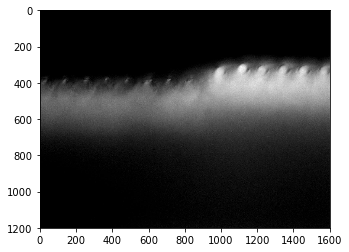

In [3]:
img = np.array(Image.open('../../../WindingImages/IMG_2017-09-03_13-27-44.jpg'))
plt.imshow(img, cmap='gray')

In [4]:
means = np.loadtxt('../Means.txt')
stds = np.loadtxt('../StdDev.txt')

In [42]:
names = ['89_167_167_32_32',
        '93_93_93_32_32',
        '811_169_167_32_32', 
        '811_169_169_32_32',
        '811_1611_169_32_32',
        '813_169_169_32_32',
        '813_1611_169_32_32']

In [45]:
f = open('../Data/Timing_75_100.txt', 'a')

for n in names:
    model = load_model('../TrainedModels/' + n + '.h5')
    
    total_res = []
    total_class = []

    # Combine it!

    for i in range(10000):
        # resize and re-shape
        t_start_resize = timer.time()
        img2 = scipy.misc.imresize(img, (z,y))
        # apply normalization
        img2 = (img2-means)/stds
        img2 = np.reshape(img2,[1,z,y,1])
        t_stop_resize = timer.time()

        dt1 = t_stop_resize - t_start_resize
        total_res.append(dt1)

        # classifying
        t_start_class = timer.time()
        Class = model.predict_classes(img2, verbose=0)
        t_stop_class = timer.time()

        dt2 = t_stop_class - t_start_class
        total_class.append(dt2)


    total_res = np.array(total_res)
    total_class = np.array(total_class)
    
    print('Resizing and reshaping {}: {:.4f} +- {:.4f} sec'.format(n, total_res.mean(), total_res.std()))
    print('Classification time {}: {:.4f} +- {:.4f} sec'.format(n, total_class.mean(), total_class.std()))

    f.write('{}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\n'.format(n, total_res.mean(), total_res.std(), total_class.mean(), total_class.std()))


f.close()

Resizing and reshaping 89_167_167_32_32: 0.0045 +- 0.0000 sec
Classification time 89_167_167_32_32: 0.0035 +- 0.0038 sec
Resizing and reshaping 93_93_93_32_32: 0.0046 +- 0.0000 sec
Classification time 93_93_93_32_32: 0.0023 +- 0.0054 sec
Resizing and reshaping 811_169_167_32_32: 0.0045 +- 0.0000 sec
Classification time 811_169_167_32_32: 0.0042 +- 0.0039 sec
Resizing and reshaping 811_169_169_32_32: 0.0045 +- 0.0002 sec
Classification time 811_169_169_32_32: 0.0043 +- 0.0038 sec
Resizing and reshaping 811_1611_169_32_32: 0.0044 +- 0.0000 sec
Classification time 811_1611_169_32_32: 0.0044 +- 0.0061 sec
Resizing and reshaping 813_169_169_32_32: 0.0044 +- 0.0000 sec
Classification time 813_169_169_32_32: 0.0044 +- 0.0039 sec
Resizing and reshaping 813_1611_169_32_32: 0.0044 +- 0.0000 sec
Classification time 813_1611_169_32_32: 0.0046 +- 0.0038 sec


In [60]:
name = np.genfromtxt('../Data/Timing_75_100.txt', unpack=True, usecols=[0], dtype=str)

res, clas = np.genfromtxt('../Data/Timing_75_100.txt', unpack=True, usecols=[1,3])

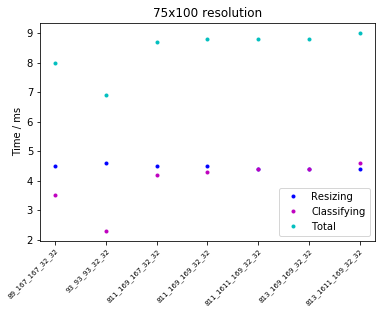

In [74]:
fig, ax = plt.subplots()

ax.plot(res*1000, color='b', marker='.', ls='', label='Resizing')
ax.plot(clas*1000, color='m', marker='.', ls='', label='Classifying')
ax.plot((res+clas)*1000, color='c', marker='.', ls='', label='Total')

ax.set_ylabel('Time / ms')
ax.legend(loc='best')
ax.set_title('75x100 resolution')

_ = plt.xticks(np.arange(len(name)), name, rotation=45, rotation_mode='anchor', ha='right', va='top', fontsize=7)

# Score distribution for models on testdata

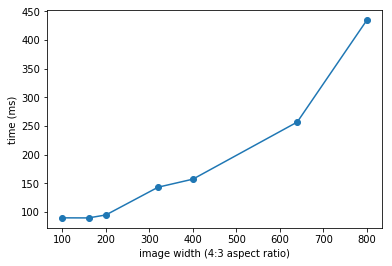

In [6]:
plt.plotfile('totaltime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

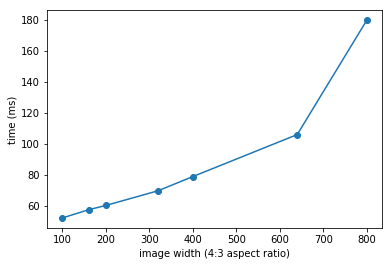

In [7]:
plt.plotfile('resizetime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

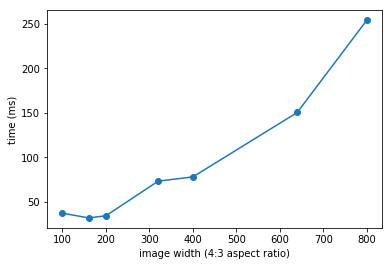

In [8]:
plt.plotfile('classtime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

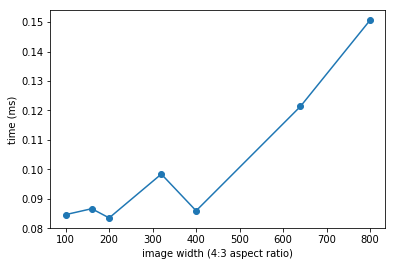

In [9]:
plt.plotfile('formattime.txt', delimiter=' ', cols=(0, 1), 
             names=('image width (4:3 aspect ratio)', 'time (ms)'), marker='o')
plt.show()

0.962794959545
[  4.94065646e-324   1.88421011e-002   1.39923990e-002 ...,
   2.17805922e-004   2.20752365e-004   2.19703114e-004]
1238


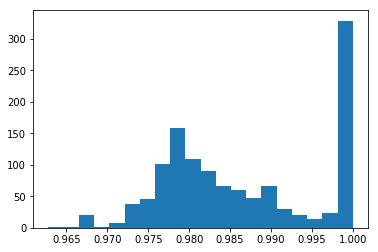

In [18]:
col1, col2 = np.genfromtxt('histstill.dat', unpack=True, dtype=np.float)

print(np.min(col1[1:]))
print(col2)
print(len(col2))
fig, ax = plt.subplots()

ax.hist(col1[1:], bins=20)
#ax.hist(col2)
plt.show()



(600, 800)


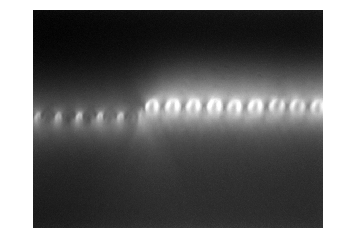

In [16]:
img = np.array(Image.open('/fhgfs/groups/e5/lhcb/detector/scifi/SciFi-CAIR2/Images_Jul_2017/Grey_800x600/PosTrain/IMG11931.bmp'))
#img = scipy.misc.imresize(img, (75,100))
#img = scipy.ndimage.interpolation.shift(img, (25,0), output=None, order=1, mode='nearest', cval=0.0, prefilter=True)
print(img.shape)
plt.axis('off')
plt.imshow(img,cmap='gray')
plt.savefig('../Data/600_800_pos.png')
plt.show()

In [23]:
for width in range(40, 800+20, 20):
    height = 0.75*width
    if height%0.75 == 0:
        img2 = scipy.misc.imresize(img, (int(height), int(width)))
        plt.imshow(img2, cmap='gray')
        plt.savefig('../Data/{:d}_{:d}_pos.png'.format(int(height), int(width)))

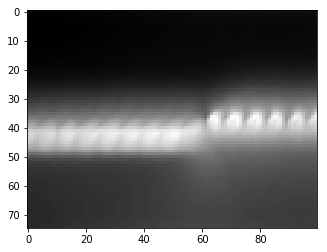

In [10]:
img2 = scipy.misc.imresize(img, (75,100))
#img2 = scipy.ndimage.interpolation.shift(img, (0,200), output=None, order=1, mode='nearest', cval=0.0, prefilter=True)

plt.imshow(img2, cmap='gray')
plt.show()

In [1]:
from datetime import datetime

In [10]:
str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

'2017-08-22_10-12-53'